In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    r_squared = corr**2

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr,'r_squared':r_squared,
            'minmax':minmax,
           })

In [3]:
df = pd.read_parquet('part-00000-7b3daec5-7a26-416d-bf2f-17cb73ff37c6-c000.snappy.parquet')

In [4]:
df.tail()

,prediction,Itau_close
170,27.660904,27.780001
171,27.949074,27.070000
172,27.157893,26.500000
173,26.460768,26.510000
174,26.725284,27.610001


In [5]:
print("The closing price forecast today is: ", df['prediction'].iloc[-1])

The closing price forecast today is:  26.72528398900345


# Perfomance

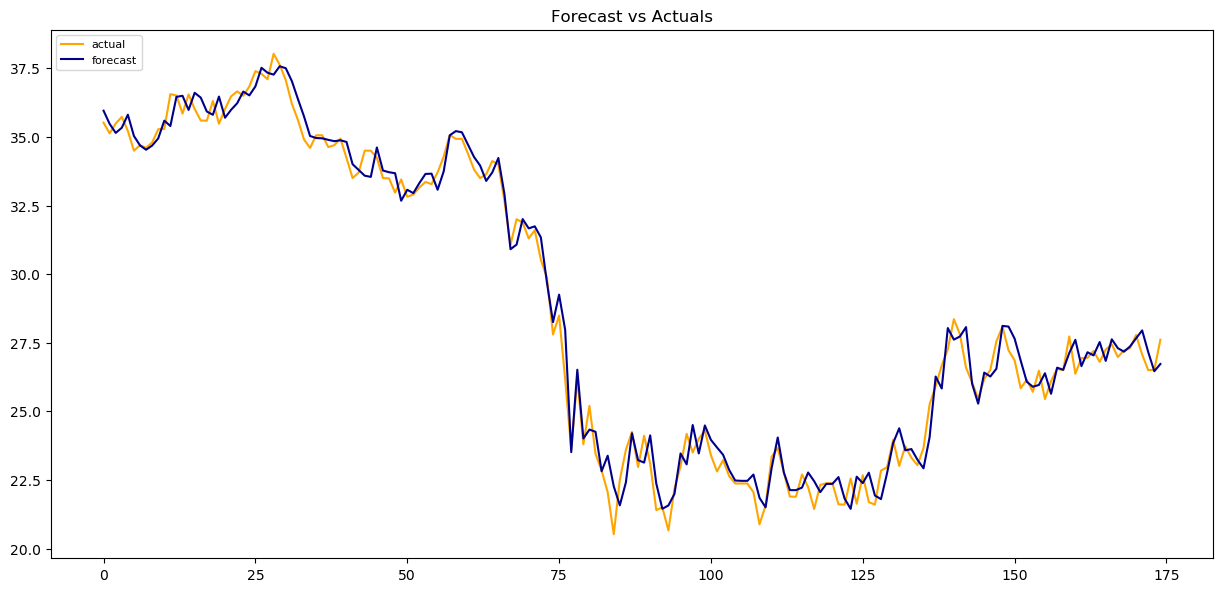

In [6]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df.Itau_close, label='actual',color = 'orange')
plt.plot(df.prediction, label='forecast',color='darkblue')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Metrics

In [7]:
Linear_model_perf = forecast_accuracy(df.prediction, df.Itau_close)
print("The RMSE is: ", Linear_model_perf['rmse'])
print("The Correlation is: ", Linear_model_perf['corr'])
print("The R_squared is: ", Linear_model_perf['r_squared'])

The RMSE is:  0.6104765094774057
The Correlation is:  0.9938932727337767
The R_squared is:  0.9878238375854574
